<a href="https://colab.research.google.com/github/LarkinConor/Resume/blob/main/Larkin_Conor_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rename the notebook as Lastname.Firstname-A1.ipynb for submission.

1. Import required packages.
2. Get a data file with real estate listings for a town of your choice from redfin.com
3. Select only the following columns from the dataset: 'PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'.

3 pts.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Westfield_redfin.csv"
listings = pd.read_csv(path)

In [ ]:
listings.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,301 Orenda Cir,Westfield Town,NJ,07090-2905,2449000,6.0,6.5,...,Pre On-Market,September-24-2022 01:00 PM,September-24-2022 03:00 PM,https://www.redfin.com/NJ/Westfield/301-Orenda...,GSMLS,3808681,N,Y,40.666954,-74.363719
1,MLS Listing,NaN,Single Family Residential,4 Kirkstone Cir,Westfield Town,NJ,07090-3749,1150000,5.0,3.5,...,Pre On-Market,NaN,NaN,https://www.redfin.com/NJ/Westfield/4-Kirkston...,GSMLS,3808560,N,Y,40.662692,-74.368163
2,MLS Listing,NaN,Single Family Residential,128 Hamilton Ave,Westfield Town,NJ,07090-3737,1499999,5.0,3.0,...,Pre On-Market,NaN,NaN,https://www.redfin.com/NJ/Westfield/128-Hamilt...,GSMLS,3808520,N,Y,40.662089,-74.366880
3,MLS Listing,NaN,Single Family Residential,177 Harrison Ave,Westfield Town,NJ,07090-2432,1100000,5.0,3.5,...,Pre On-Market,September-24-2022 01:00 PM,September-24-2022 04:00 PM,https://www.redfin.com/NJ/Westfield/177-Harris...,GSMLS,3808407,N,Y,40.658029,-74.346215
4,MLS Listing,NaN,Single Family Residential,6 Faulkner Dr,Westfield Town,NJ,07090-2823,1799000,6.0,6.0,...,Active,NaN,NaN,https://www.redfin.com/NJ/Westfield/6-Faulkner...,GSMLS,3807960,N,Y,40.631263,-74.327930


In [ ]:
listings.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [ ]:
listings = listings[['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']]

4. Check for missing values using a heatmap.
5. Check data distribution by property type using a histogram (bar graph).
6. Exclude records if appropriate.

3 pts.



In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PROPERTY TYPE  109 non-null    object 
 1   PRICE          109 non-null    int64  
 2   BEDS           105 non-null    float64
 3   BATHS          103 non-null    float64
 4   SQUARE FEET    27 non-null     float64
 5   LOT SIZE       97 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.2+ KB


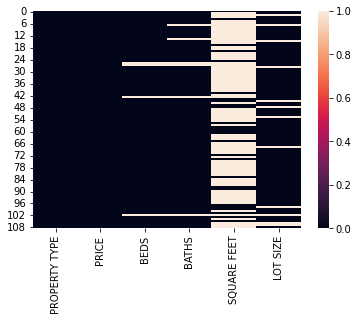

In [ ]:
sns.heatmap(listings.isnull(), cbar=True)

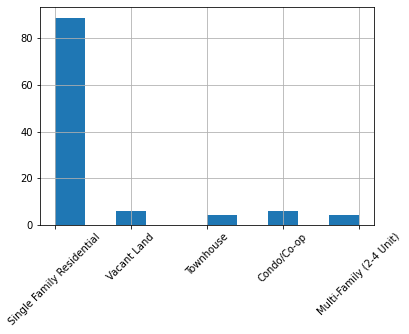

In [ ]:
listings['PROPERTY TYPE'].hist(xrot=45.0)

In [ ]:
listings = listings[['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'LOT SIZE']]

In [ ]:
listings.columns

Index(['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'LOT SIZE'], dtype='object')

7. Build a pairplot to evaluate data distributions and correlations.
8. Comment whether the predictors: 1) have a linear relationship with the target (Price), 2) display constant variance (homoscedasticity), 3) contain outliers that need to be excluded.

5 pts.

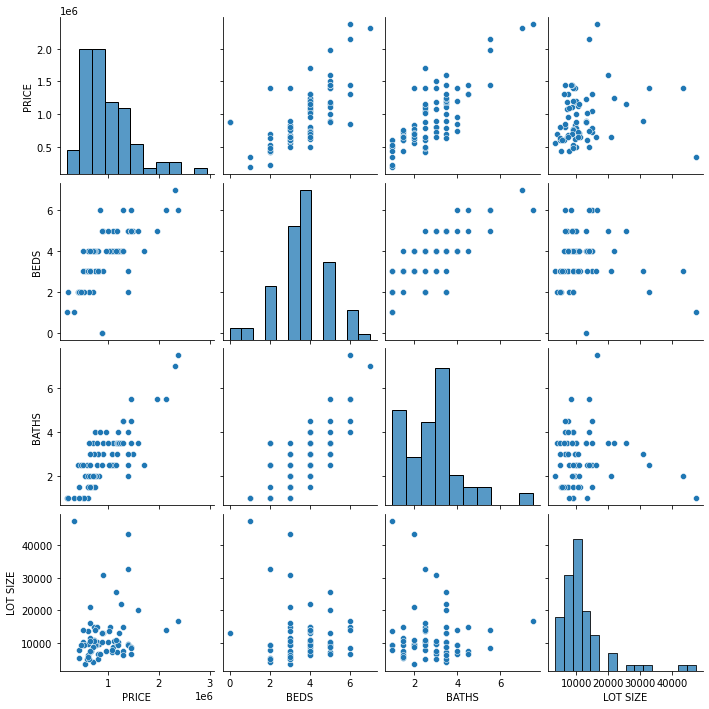

In [ ]:
sns.pairplot(listings)

8a
1) all predictors have a positive relation with price

2) The pairplot shows homoscedastify in that all of the data points share a variance when the predictor is changed

3) There are outliers in the square feet and lot size that need to be excluded

9. Remove outliers if necessary.
10. Impute missing values as appropriate.

2 pts.


In [ ]:
listings.describe()

,PRICE,BEDS,BATHS,LOT SIZE
count,8.000000e+01,76.000000,74.000000,71.000000
mean,9.807125e+05,3.671053,2.864865,11988.929577
std,4.967980e+05,1.360276,1.327520,7971.499458
min,1.850000e+05,0.000000,1.000000,3484.000000
25%,6.465000e+05,3.000000,2.000000,7448.500000
50%,8.750000e+05,4.000000,2.500000,9583.000000
75%,1.205500e+06,4.250000,3.500000,13503.000000
max,2.950000e+06,7.000000,7.500000,47480.000000


In [ ]:
listings.drop(listings[listings['LOT SIZE'] > 50000 ].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
imputed = listings.fillna(listings.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
imputed.describe()

,PRICE,BEDS,BATHS,LOT SIZE
count,8.000000e+01,80.000000,80.000000,80.000000
mean,9.807125e+05,3.671053,2.864865,11988.929577
std,4.967980e+05,1.325391,1.276113,7503.700566
min,1.850000e+05,0.000000,1.000000,3484.000000
25%,6.465000e+05,3.000000,2.000000,7840.000000
50%,8.750000e+05,4.000000,2.864865,10018.000000
75%,1.205500e+06,4.000000,3.500000,13068.000000
max,2.950000e+06,7.000000,7.500000,47480.000000


11. Split data 70/30 into training and test datasets.
12. Build a multiple linear regression model to predict Price.
13. Report R2, MAE, Max error, RMSE.
14. Comment on whether the model performance would be acceptable for practitioners.

7 pts.

In [ ]:
imputed.columns

Index(['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'LOT SIZE'], dtype='object')

In [ ]:
predictors = ['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'LOT SIZE']

In [ ]:
X = pd.get_dummies(imputed[predictors], drop_first=True)
y = imputed['PRICE']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
re_prices = LinearRegression()

re_prices.fit(train_X, train_y)

LinearRegression()

In [ ]:
X.columns

Index(['PRICE', 'BEDS', 'BATHS', 'LOT SIZE',
       'PROPERTY TYPE_Multi-Family (2-4 Unit)',
       'PROPERTY TYPE_Single Family Residential', 'PROPERTY TYPE_Townhouse',
       'PROPERTY TYPE_Vacant Land'],
      dtype='object')

In [ ]:
re_prices.intercept_

1.1641532182693481e-10

In [ ]:
re_prices.coef_

array([ 1.00000000e+00, -5.93280585e-12, -9.23486569e-12, -1.97936476e-16,
       -3.30387569e-25,  2.65677428e-11,  3.24385960e-11,  2.87243506e-11])

In [ ]:
train_X.head()

,PRICE,BEDS,BATHS,LOT SIZE,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse,PROPERTY TYPE_Vacant Land
24,875000,5.0,2.5,10018.000000,0,1,0,0
80,650000,4.0,3.0,7492.000000,0,1,0,0
106,2325000,7.0,7.0,11988.929577,0,1,0,0
90,1299000,4.0,3.5,6098.000000,0,1,0,0
32,1179000,4.0,3.0,9583.000000,0,1,0,0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score

In [ ]:
pred_y = re_prices.predict(valid_X)

In [ ]:
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

Regression model performance evaluation
R2:  1.0
MAE:  1.2126596023639044e-11
RMSE:  3.143572975341939e-11
Max error:  1.1641532182693481e-10


14. I do not know why the model is reporting an R2 of 1.0, so i would not say that this model would be acceptable for practioners use. I have tried to drop things and impute and i checked the code to the best of my ability and I can't change the results to a realistic model